In [1]:
from implicit_learning.trainer import PoissonTrainer 
from implicit_learning.model import  Siren
from implicit_learning.dataset import PoissonEqn
from implicit_learning.utils import *
from torchvision.transforms import Resize, Compose, ToTensor, Normalize
from torch.utils.data import DataLoader 

import torch
import matplotlib.pyplot as plt 


In [2]:
def construct_dataloader(config):
    sidelength = config['sidelength']
    transform = Compose([
        Resize(sidelength),
        ToTensor(),
        Normalize(torch.Tensor([0.5]), torch.Tensor([0.5]))
    ])

    train = PoissonEqn(config, transform=transform)
    valid = PoissonEqn(config, transform=transform)
    test  = PoissonEqn(config, transform=transform)
    
    train_dataloader =  DataLoader(train, batch_size=config.get("batch_size"), shuffle=True, pin_memory=True)
    valid_datalodaer =  DataLoader(valid, batch_size=config.get("batch_size"), shuffle=True, pin_memory=True)
    test_dataloader =   DataLoader(test, batch_size=config.get("batch_size"), shuffle=True, pin_memory=True)

    return train_dataloader, valid_datalodaer, test_dataloader


class CustomizeTrainer(PoissonTrainer):
    def __init__(self, model, train_dataloader, valid_dataloader, test_dataloader, config):
        super().__init__(model, train_dataloader, valid_dataloader, test_dataloader, config)
    
    def train(self):
        for epoch in range(self.epochs):
            inputs = self.model_input

            self.optimizer.zero_grad() 
            outputs, coords =self.model(inputs)
            self.loss = self.compute_loss(outputs, coords) 
       
            if epoch % config.get("print_epoch") == 0:
                print("Epoch %4d"%(epoch), f" : Loss : {self.loss}")
                img_grad = gradient(outputs, coords)
                self.plot(outputs, self.gt['pixels'], img_grad, self.gt)
            self.loss.backward()
            self.optimizer.step()

    def plot(self, model_output, original, img_grad, gt):
        fig, axes = plt.subplots(1, 4, figsize=(8, 3))
        axes[0].imshow(model_output.cpu().view(128,128).detach().numpy(), vmin=-2, vmax=2)
        axes[1].imshow(original.cpu().view(128,128).detach().numpy(), vmin=-2, vmax=2)
        axes[2].imshow(img_grad.cpu().norm(dim=-1).view(128,128).detach().numpy(), vmin=-2, vmax=2)
        axes[3].imshow(gt['grads'].cpu().norm(dim=-1).view(128,128).detach().numpy(), vmin=-2, vmax=2)
        plt.show()

Epoch    0  : Loss : 34.25593566894531


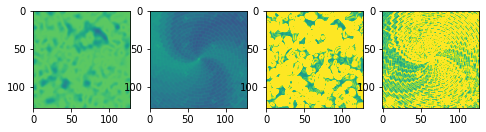

Epoch  100  : Loss : 2.246107578277588


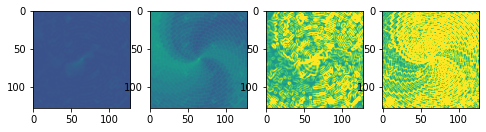

Epoch  200  : Loss : 1.6237738132476807


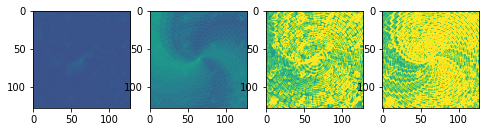

Epoch  300  : Loss : 1.4320073127746582


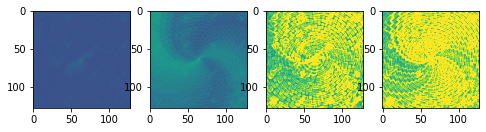

Epoch  400  : Loss : 1.3844101428985596


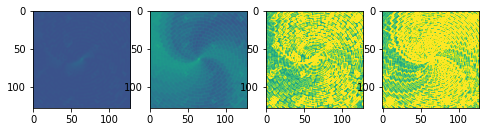

Epoch  500  : Loss : 1.760221242904663


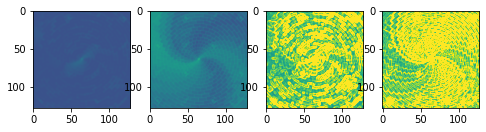

Epoch  600  : Loss : 1.1901955604553223


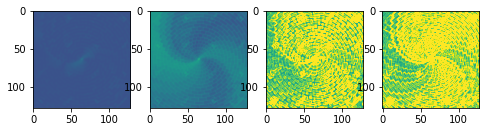

Epoch  700  : Loss : 1.1497766971588135


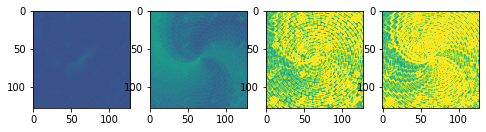

Epoch  800  : Loss : 1.1207219362258911


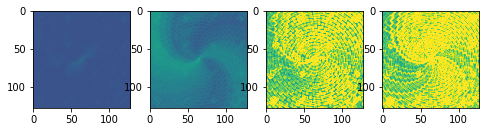

Epoch  900  : Loss : 1.109646201133728


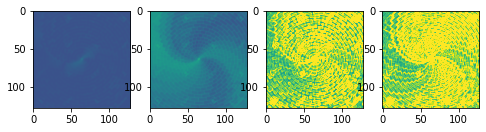

Epoch 1000  : Loss : 1.1305961608886719


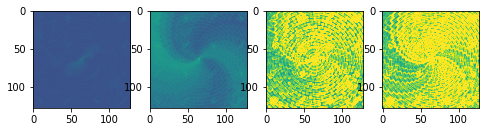

Epoch 1100  : Loss : 1.0901764631271362


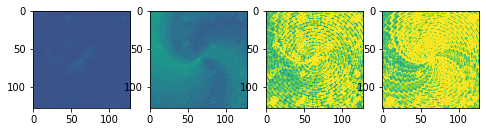

Epoch 1200  : Loss : 1.1568529605865479


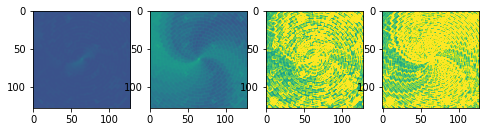

Epoch 1300  : Loss : 0.9685209393501282


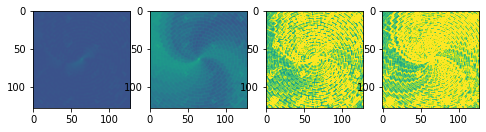

Epoch 1400  : Loss : 1.0171983242034912


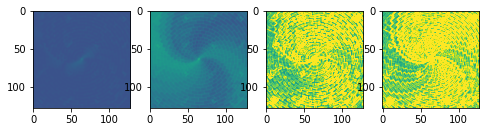

Epoch 1500  : Loss : 0.8742978572845459


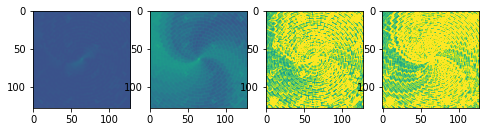

Epoch 1600  : Loss : 0.9671236872673035


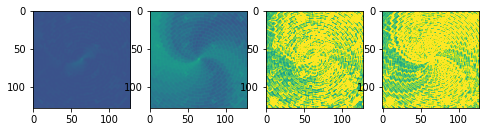

Epoch 1700  : Loss : 0.9135521650314331


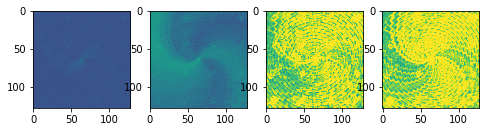

Epoch 1800  : Loss : 0.9105759859085083


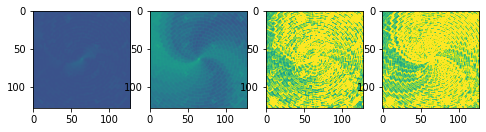

Epoch 1900  : Loss : 0.7743744254112244


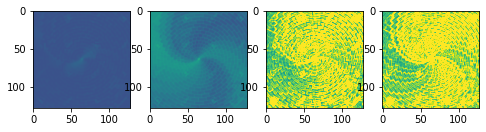

Epoch 2000  : Loss : 0.7175790667533875


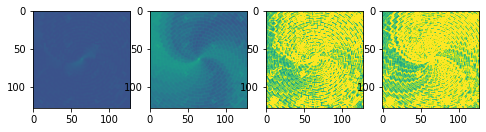

Epoch 2100  : Loss : 0.6990225911140442


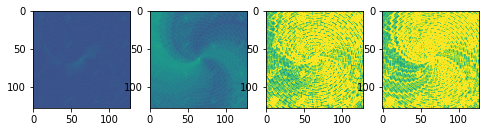

Epoch 2200  : Loss : 0.6744462251663208


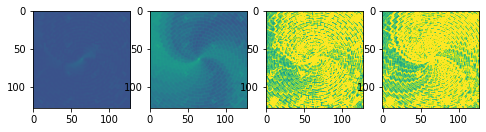

Epoch 2300  : Loss : 0.5951579213142395


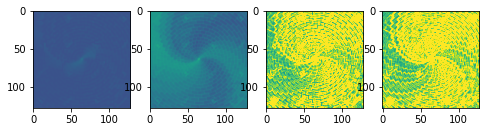

Epoch 2400  : Loss : 0.5713720321655273


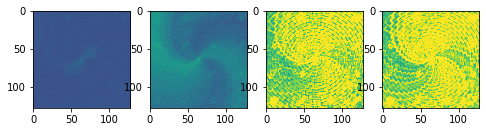

Epoch 2500  : Loss : 0.5656417608261108


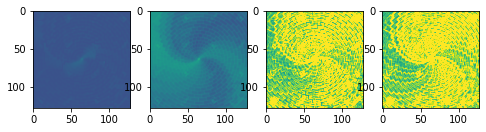

Epoch 2600  : Loss : 0.8049800395965576


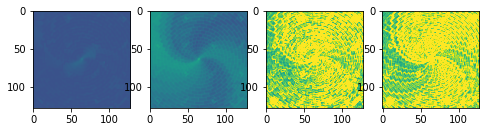

Epoch 2700  : Loss : 0.5252982378005981


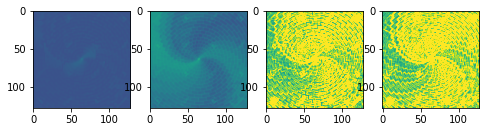

Epoch 2800  : Loss : 0.5066126585006714


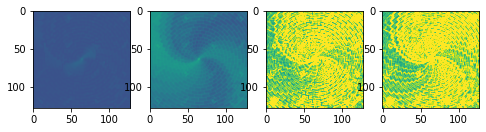

Epoch 2900  : Loss : 0.46371808648109436


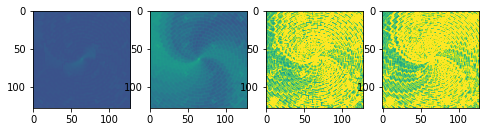

Epoch 3000  : Loss : 0.4364948272705078


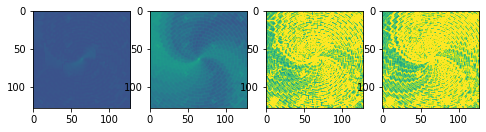

Epoch 3100  : Loss : 0.5061207413673401


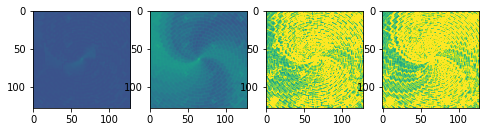

Epoch 3200  : Loss : 0.6279644966125488


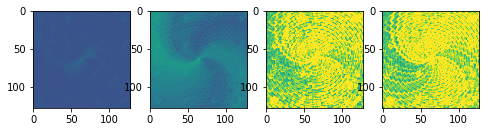

Epoch 3300  : Loss : 0.35477858781814575


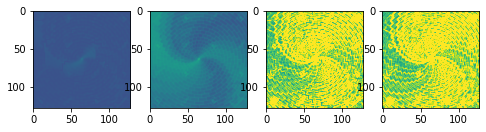

Epoch 3400  : Loss : 0.40508008003234863


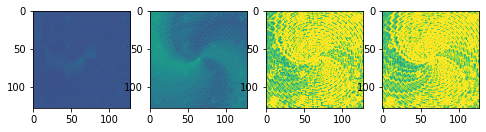

Epoch 3500  : Loss : 0.35545140504837036


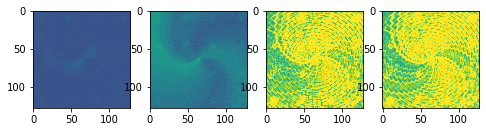

Epoch 3600  : Loss : 0.28751835227012634


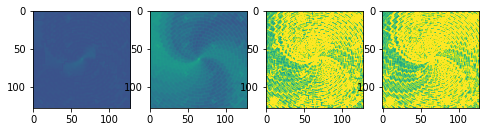

Epoch 3700  : Loss : 0.2747611403465271


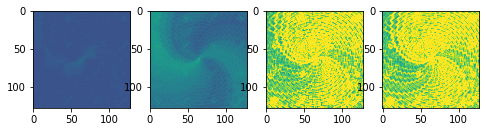

Epoch 3800  : Loss : 0.34478944540023804


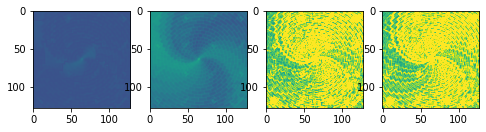

Epoch 3900  : Loss : 0.2255268543958664


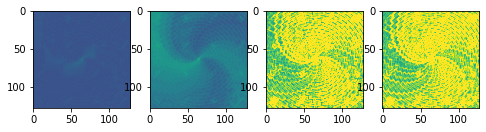

Epoch 4000  : Loss : 0.22001659870147705


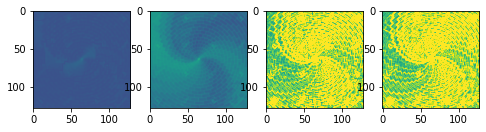

Epoch 4100  : Loss : 0.23106880486011505


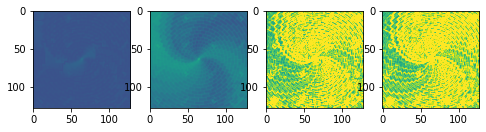

Epoch 4200  : Loss : 0.19360408186912537


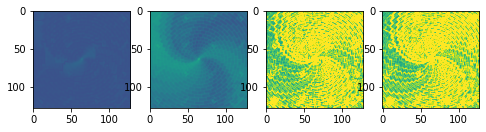

Epoch 4300  : Loss : 0.2848895192146301


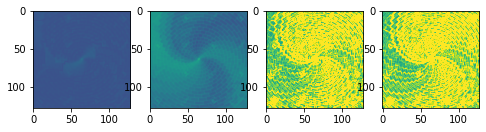

Epoch 4400  : Loss : 0.16334408521652222


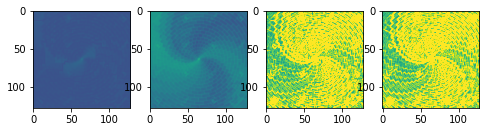

Epoch 4500  : Loss : 0.16023024916648865


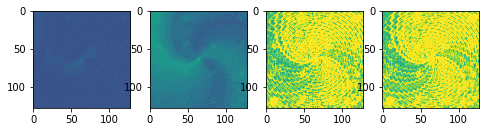

Epoch 4600  : Loss : 0.14241249859333038


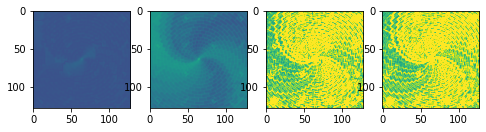

Epoch 4700  : Loss : 0.1589127779006958


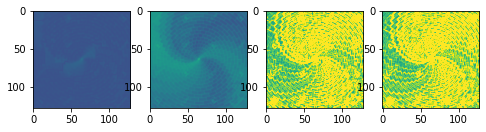

Epoch 4800  : Loss : 0.13064460456371307


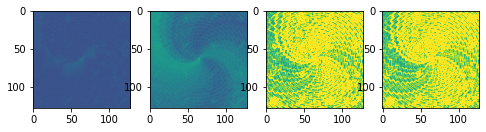

Epoch 4900  : Loss : 0.15572713315486908


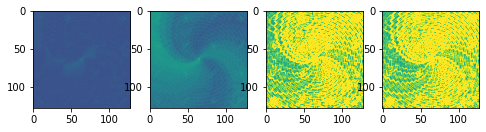

In [3]:

config = {
    "model":{
        "in_features":2,
        "hidden_features":256,
        "hidden_layers":3,
        "out_features":1
    },
    "sidelength":128,
    "epochs":5000,
    "lr":0.0001,
    "batch_size":1,
    "data-path":"../../data/spectrum.jpg",
    "print_epoch":100
}

model = Siren(**config['model'])
model.cuda()
trainer = CustomizeTrainer(model, *construct_dataloader(config), config)
trainer.train()


In [4]:
trainer.gt['pixels']

tensor([[[ 0.1242],
         [ 0.1242],
         [ 0.1216],
         ...,
         [-0.3935],
         [-0.3830],
         [-0.2680]]], device='cuda:0')